## Hyperparameter tuning Techniques in PIMA diabetes data set

reference 1 : https://www.kaggle.com/uciml/pima-indians-diabetes-database

reference 2: github- Krish Naik

### Introduction: 

 This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
 
 The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


#### Applied Hyper parameter techniques are :

   - RandamisedSearchCV
   - GridSearchCV
   - Automated Hyperparameter Tuning
       - Bayesian Optimization
    

In [126]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("C:\\Projects\\SpringBoard\\Glucose data for story telling\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
import numpy as np
df['Glucose']=np.where(df['Glucose']==0,df['Glucose'].median(),df['Glucose'])
df['Insulin']=np.where(df['Insulin']==0,df['Insulin'].median(),df['Insulin'])
df['SkinThickness']=np.where(df['SkinThickness']==0,df['SkinThickness'].median(),df['SkinThickness'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1


In [31]:
#### Independent And Dependent features
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [32]:
pd.DataFrame(X,columns=df.columns[:-1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35,30.5,33.6,0.627,50
1,1,85.0,66,29,30.5,26.6,0.351,31
2,8,183.0,64,0,30.5,23.3,0.672,32
3,1,89.0,66,23,94.0,28.1,0.167,21
4,0,137.0,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63
764,2,122.0,70,27,30.5,36.8,0.340,27
765,5,121.0,72,23,112.0,26.2,0.245,30
766,1,126.0,60,0,30.5,30.1,0.349,47


In [46]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=33)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [48]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))


[[85 14]
 [29 26]]
0.7207792207792207
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        99
           1       0.65      0.47      0.55        55

    accuracy                           0.72       154
   macro avg       0.70      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



In [97]:
from sklearn.metrics import recall_score, precision_score

print(f1_score(y_test, prediction, average="macro"))
print(precision_score(y_test, prediction, average="macro"))
print(recall_score(y_test, prediction, average="macro"))

0.6727452433901655
0.6978070175438597
0.6656565656565656


In [95]:
from sklearn.metrics import confusion_matrix
TP, FP, FN, TN = confusion_matrix(y_test, prediction).ravel()
c_matrix = pd.DataFrame({'Predicted = Fraud': [TP, FP],
                                 'Predicted = Not Fraud': [FN, TN]
                                }, index=['Fraud', 'Not Fraud'])
c_matrix

,Predicted = Fraud,Predicted = Not Fraud
Fraud,85,29
Not Fraud,14,26


 Our Precision for the model stands at 0.697. This indicates that 69.7% of the time our model classified the patients in a high risk category when they actually had a high risk of getting diabetes.
 
The Recall/Sensitivity is .6656, implying of 66.56% of the time people having actually having high risk were classified correctly by our model.
The accuracy score gives us 72%

The main parameters used by a Random Forest Classifier are:

 - criterion = the function used to evaluate the quality of a split.
 - max_depth = maximum number of levels allowed in each tree.
 - max_features = maximum number of features considered when splitting a node.
 - min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensemble.

In [52]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[88 11]
 [26 29]]
0.7597402597402597
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



#### RandomizedSearchCV

 - It will narrow down our results
 - n_estimators are my number of trees in Random Forest

In [53]:
# n_estimators are my number of trees in Random Forest
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1, 3, 4, 5, 7, 9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [54]:
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [55]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 890,
 'criterion': 'gini'}

In [56]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=890, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=1000)

In [57]:
best_random_grid=rf_randomcv.best_estimator_

In [59]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[85 14]
 [24 31]]
Accuracy Score 0.7532467532467533
Classification report:               precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [121]:
print(precision_score(rf_randomcv.predict(X_test), y_test))
print(f1_score(rf_randomcv.predict(X_test), y_test))

0.5272727272727272
0.6041666666666666


In [150]:
print(precision_score(best_random_grid.predict(X_test), y_test))
print(f1_score(best_random_grid.predict(X_test), y_test))
print(recall_score(best_random_grid.predict(X_test), y_test))

0.5636363636363636
0.6199999999999999
0.6888888888888889


Text(0.5, 1.0, 'RandomizedSearchCV gini Precision / Recall plot')

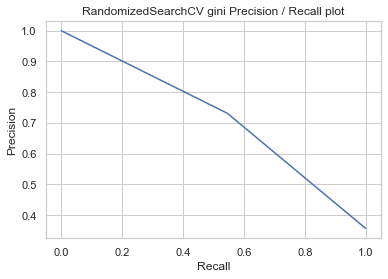

In [151]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomizedSearchCV gini Precision / Recall plot')

#### Observation:

RandomizedSearchCV gives us 61.99% F1 score, 75.52% precision_score with the best parameter

Our Precision for the model stands at 0.5636. This indicates that 56.36% of the time our model classified the patients in a high risk category when they actually had a high risk of getting diabetes. 

#### GridSearchCV

In [60]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 890,
 'criterion': 'gini'}

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [890], 'max_features': ['auto'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [5, 6, 7, 8, 9], 'n_estimators': [800, 900, 1000, 1100, 1200]}


In [71]:
#This is the calculation of total number of iteration. 
#criterion=1 prameter,max_depth=1 parameter, max_features=1 parameter, min_samples_leaf=3 parameter
#min_samples_split = 5 parameters, n_estimators=5 parameters.
#here we get 75 iterations. Permutation and combination will be happening here. 

1*1*1*3*5*5 

75

In [64]:
# Explanation of the above cell: min_samples_leaf we got = 2

#     2+2 = 4
    
#     2+4 = 6

[rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4]

[2, 4, 6]

In [66]:
# Explanation of the above cell: min_samples_split we got = 7

#     7-2 = 5
    
#     7-1 = 6 , 7+0 = 7, 7+1 =8, 7+2=9
[rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2]

[5, 6, 7, 8, 9]

In [72]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 10.7min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [890],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [5, 6, 7, 8, 9],
                         'n_estimators': [800, 900, 1000, 1100, 1200]},
             verbose=2)

 Verbose is giving above colored particular screen. n_jobs=-1 , In our sustem we have chords. Machine learning we need CPU chords. here n_jobs takes all the cores from the system

In [73]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=890, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=900)

In [74]:
best_grid=grid_search.best_estimator_

In [75]:
best_grid

RandomForestClassifier(max_depth=890, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=900)

In [76]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[88 11]
 [25 30]]
Accuracy Score 0.7662337662337663
Classification report:               precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.73      0.55      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [100]:
from sklearn.metrics import recall_score, precision_score

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.7275943396226414
0.7552341895100367
0.7171717171717171


Text(0.5, 1.0, 'GridSearchCV gini Precision / Recall plot')

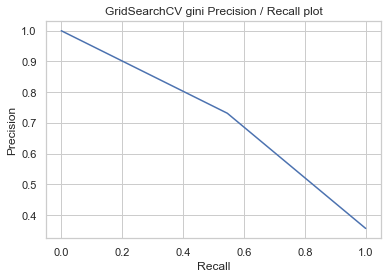

In [138]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('GridSearchCV gini Precision / Recall plot')

In [102]:
from sklearn.metrics import confusion_matrix
TP, FP, FN, TN = confusion_matrix(y_test, y_pred).ravel()
c_matrix = pd.DataFrame({'Predicted = YES': [TP, FP],
                                 'Predicted = No': [FN, TN]
                                }, index=['Predicted yes', 'Predicted No'])
c_matrix

,Predicted = YES,Predicted = No
Predicted yes,88,25
Predicted No,11,30


####  Observation:
 
GridSearchCV gives us 72.75% F1 score, 75.52% precision_score

Our Precision for the model stands at 0.7552. This indicates that 75.52% of the time our model classified the patients in a high risk category when they actually had a high risk of getting diabetes. The Recall/Sensitivity is 0.7171, implying of 71.71% of the time people having actually having high risk were classified correctly by our model.

### Automated Hyperparameter Tuning

Automated Hyperparameter Tuning can be done by using techniques such as

 - Bayesian Optimization
 
 - Gradient Descent
 
 - Evolutionary Algorithms
 
#### Bayesian Optimization
 
Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time. In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin. (fmin ,It is basically minimizing the function)

 - Objective Function = defines the loss function to minimize.This is a pre defined function where we define
 
 - Domain Space = defines the range of input values to test (in Bayesian  -  -  Optimization this space creates a probability distribution for each of the used Hyperparameters).
 
 - Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.

In [86]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

#Trials are responsible to minimize the function.tpe is algorithm(algo)

In [80]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [82]:
space["criterion"]

In [81]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x1e810ff97c0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x1e810ff9970>,
 'max_features': <hyperopt.pyll.base.Apply at 0x1e810ff9a90>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1e810ff9c70>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x1e810ff9d90>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x1e810ff9e80>}

In [83]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [85]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████████████████████████████████████████████| 80/80 [08:04<00:00,  6.06s/trial, best loss: -0.7752632280421164]


{'criterion': 0,
 'max_depth': 990.0,
 'max_features': 3,
 'min_samples_leaf': 0.05412899823430256,
 'min_samples_split': 0.09778797143909385,
 'n_estimators': 3}

In [87]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
None
750


In [88]:
best['min_samples_leaf']

0.05412899823430256

In [89]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[86 13]
 [27 28]]
0.7402597402597403
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        99
           1       0.68      0.51      0.58        55

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [98]:
from sklearn.metrics import recall_score, precision_score

print(f1_score(y_test, predictionforest, average="macro"))
print(precision_score(y_test, predictionforest, average="macro"))
print(recall_score(y_test, predictionforest, average="macro"))

0.6973270440251573
0.7219943880854738
0.6888888888888889


Text(0.5, 1.0, 'Bayesian Optimization gini Precision / Recall plot')

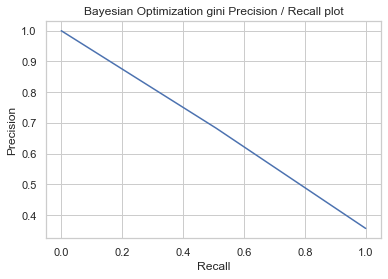

In [139]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, predictionforest)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Bayesian Optimization gini Precision / Recall plot')

In [104]:
from sklearn.metrics import confusion_matrix
TP, FP, FN, TN = confusion_matrix(y_test, predictionforest).ravel()
c_matrix = pd.DataFrame({'Predicted = YES': [TP, FP],
                                 'Predicted = No': [FN, TN]
                                }, index=['Predicted yes', 'Predicted No'])
c_matrix

,Predicted = YES,Predicted = No
Predicted yes,86,27
Predicted No,13,28


#### Observation:

In Bayesian Optimization precision_score gives us 72.19% - best score
 
 Our Precision for the model stands at 0.7219. This indicates that 72.19% of the time our model classified the patients in a high risk category when they actually had a high risk of getting diabetes.
The Recall/Sensitivity is 0.6888, implying of 68.88% of the time people having actually having high risk were classified correctly by our model.

#### Precision score comparison of three hyper parameter tuning in Diabetis data set

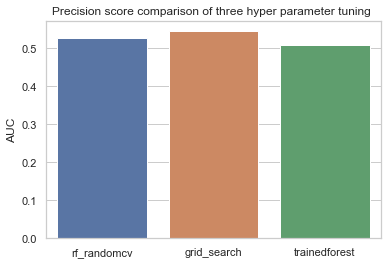

In [145]:
sns.set_theme(style="whitegrid")
sns.barplot(x=["rf_randomcv", "grid_search", "trainedforest"],
            y=[precision_score(rf_randomcv.predict(X_test), y_test), precision_score(grid_search.predict(X_test), y_test),
               precision_score(trainedforest.predict(X_test), y_test)])

plt.title('Precision score comparison of three hyper parameter tuning ')               
plt.ylabel("AUC") 
plt.show()

 Here our GridSearchCV gives us good precision score 

#### F1 score comparison of three hyper parameter tuning in Diabetis data set

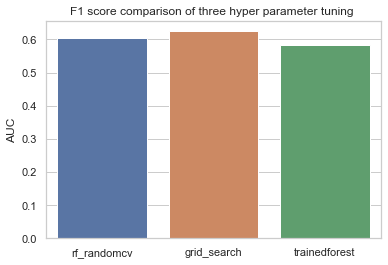

In [146]:
sns.set_theme(style="whitegrid")
sns.barplot(x=["rf_randomcv", "grid_search", "trainedforest"],
            y=[f1_score(rf_randomcv.predict(X_test), y_test), f1_score(grid_search.predict(X_test), y_test),
               f1_score(trainedforest.predict(X_test), y_test)])


plt.title('F1 score comparison of three hyper parameter tuning ')                
plt.ylabel("AUC") 
plt.show()

#### Model Comparisons

![](img1.png "Title")

 Here our GridSearchCV gives us good F1 score

Random Forest Classifier as the right model due to high accuracy, precision and recall score. One reason why Random Forest Classifier showed an improved performance was because of the presence of outliers. Random Forest is not a a distance based algorithm. It is a tree based algorithm.

 - Glucose is the most important factor in determining the onset of diabetes followed by BMI and Age.
 
 - Other factors such as Diabetes Pedigree Function, Pregnancies, Blood Pressure, Skin Thickness and Insulin also contributes to the prediction.